In [41]:
# Step 1: Import Libraries & Load Dataset
# Importing essential libraries for data handling, visualization, and modeling
import pandas as pd                    # for data manipulation
import numpy as np                     # for numerical operations
import matplotlib.pyplot as plt        # for plotting graphs
import seaborn as sns                  # for styled statistical plots
import warnings                        # to ignore unnecessary warnings
warnings.filterwarnings('ignore')

# Set default plot theme
plt.style.use('ggplot')
sns.set_palette('pastel')

In [42]:
# Load the dataset
# Assuming the dataset is named 'student-mat.csv' and located in the working directory
df= pd.read_csv('student-mat.csv', sep=';')

# Quick preview of the dataset
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Step 1: Import Libraries & Load Dataset

We begin by importing all the necessary Python libraries used for:
- Data manipulation (`pandas`, `numpy`)
- Visualization (`matplotlib`, `seaborn`)
- Suppressing warnings for a cleaner output

Then we load the dataset `student-mat.csv` which contains student academic performance records and preview its structure using `.head()`, `.info()`, and `.describe()`.

This step helps us understand what we're working with — number of features, data types, and potential preprocessing needs.


In [43]:
# Step 2: Data Cleaning and Preprocessing
# Basic structural info
# Checking for data types, null values, and overall shape
df.info()

# Summary statistics for numeric columns
df.describe()

# Shape of the dataset: how many rows and columns
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [44]:
# Checking for null values across all columns
null_counts = df.isnull().sum()
print("Missing values in each column:\n")
print(null_counts[null_counts > 0] if null_counts.any() else "No missing values found.")

# View unique values in categorical columns (optional exploration)
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\n{col}: {df[col].unique()}")

# One-hot encode categorical columns (excluding the target 'G3')
df_encoded = pd.get_dummies(df, drop_first=True)

# Confirm encoding and shape
print(f"Encoded dataset shape: {df_encoded.shape}")
print(df_encoded.head())

Missing values in each column:

No missing values found.

school: ['GP' 'MS']

sex: ['F' 'M']

address: ['U' 'R']

famsize: ['GT3' 'LE3']

Pstatus: ['A' 'T']

Mjob: ['at_home' 'health' 'other' 'services' 'teacher']

Fjob: ['teacher' 'other' 'services' 'health' 'at_home']

reason: ['course' 'other' 'home' 'reputation']

guardian: ['mother' 'father' 'other']

schoolsup: ['yes' 'no']

famsup: ['no' 'yes']

paid: ['no' 'yes']

activities: ['no' 'yes']

nursery: ['yes' 'no']

higher: ['yes' 'no']

internet: ['no' 'yes']

romantic: ['no' 'yes']
Encoded dataset shape: (395, 42)
   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3    

## Step 2: Data Cleaning and Preprocessing

In this step, we examine the dataset for missing values, inconsistent data, and prepare it for modeling. We focus on:

- Checking for null or missing values
- Understanding data types of each column
- Converting categorical variables into numerical format using one-hot encoding
- Ensuring the final dataset is ready for regression modeling

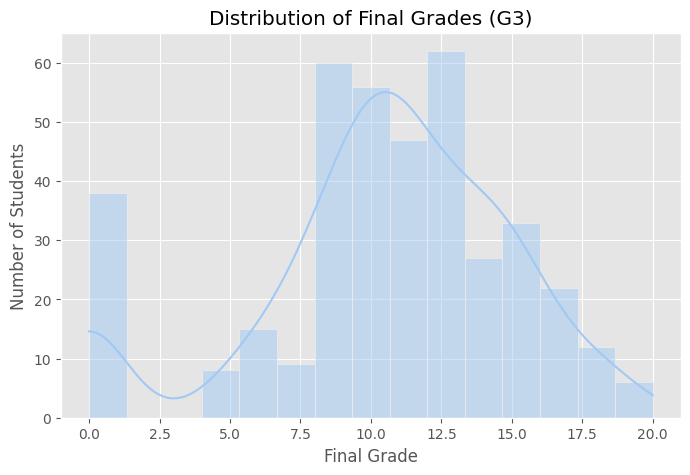

In [45]:
# Step 3: Exploratory Data Analysis (EDA)
# Visualizing distribution of final grades
plt.figure(figsize=(8, 5))
sns.histplot(df['G3'], bins=15, kde=True)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade')
plt.ylabel('Number of Students')
plt.show()

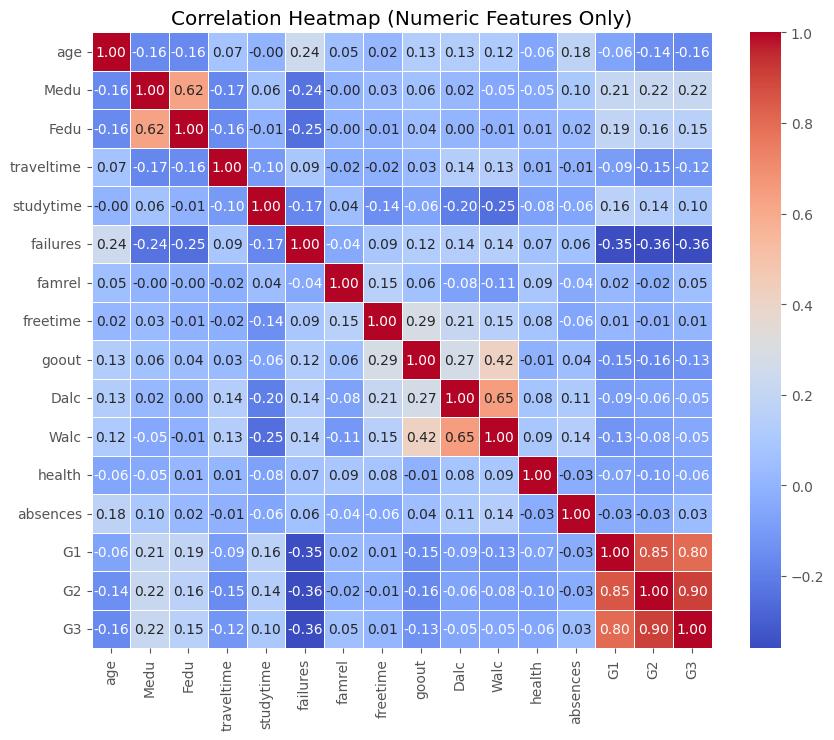

In [46]:
# Only select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


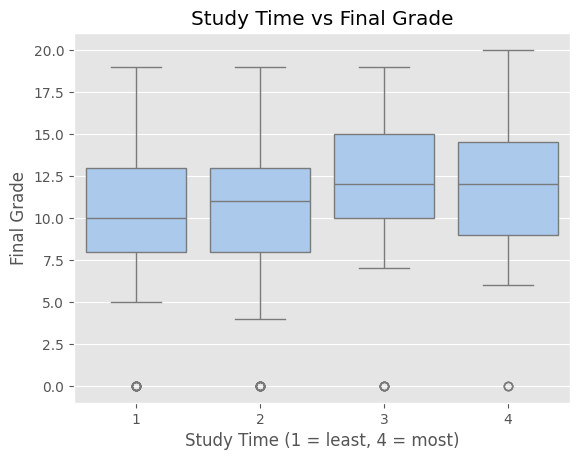

In [47]:
#  Relationship Plots
# Study time vs Final Grade
sns.boxplot(x='studytime', y='G3', data=df)
plt.title('Study Time vs Final Grade')
plt.xlabel('Study Time (1 = least, 4 = most)')
plt.ylabel('Final Grade')
plt.show()

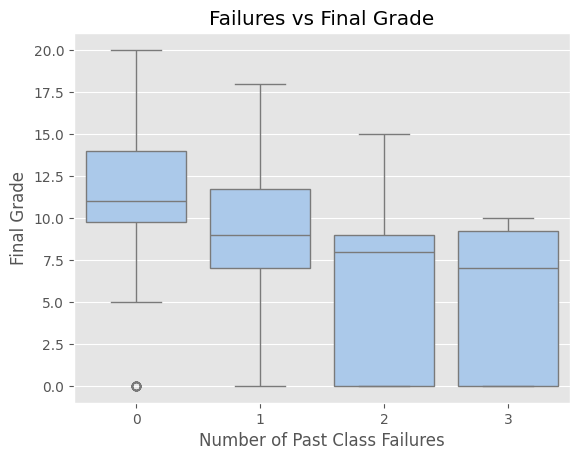

In [48]:
# Failures vs Final Grade
sns.boxplot(x='failures', y='G3', data=df)
plt.title('Failures vs Final Grade')
plt.xlabel('Number of Past Class Failures')
plt.ylabel('Final Grade')
plt.show()

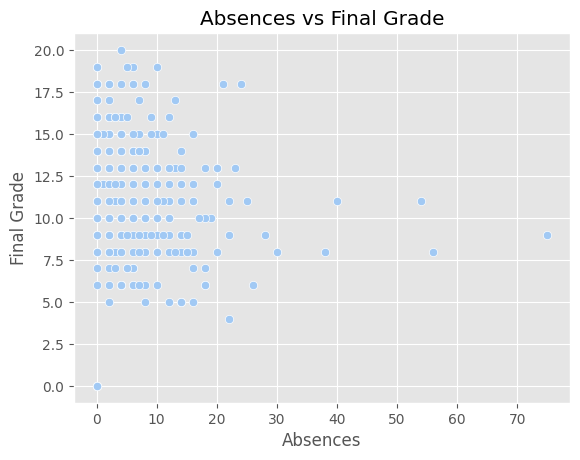

In [49]:
# Absences vs Final Grade
sns.scatterplot(x='absences', y='G3', data=df)
plt.title('Absences vs Final Grade')
plt.xlabel('Absences')
plt.ylabel('Final Grade')
plt.show()

## Step 3: Exploratory Data Analysis (EDA)

The goal of this step is to visually understand how different features influence the final grade (`G3`).

We will explore:
- Distribution of final grades
- Correlation heatmap of numeric features
- Feature relationships such as study time, absences, and failures against `G3`


In [50]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Define features and target
X = df_encoded.drop('G3', axis=1)
y = df_encoded['G3']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

R² Score: 0.72
Mean Absolute Error: 1.65


## Step 4: Model Building and Evaluation

We will now build a **Linear Regression model** to predict students' final grades (`G3`) based on multiple academic and personal attributes.

To evaluate the model, we will:

- Split the dataset into training and testing sets
- Train the model on the training data
- Evaluate the performance using R² score and Mean Absolute Error (MAE)
- Visualize residuals to assess prediction errors
- Perform 5-fold cross-validation to check model generalization


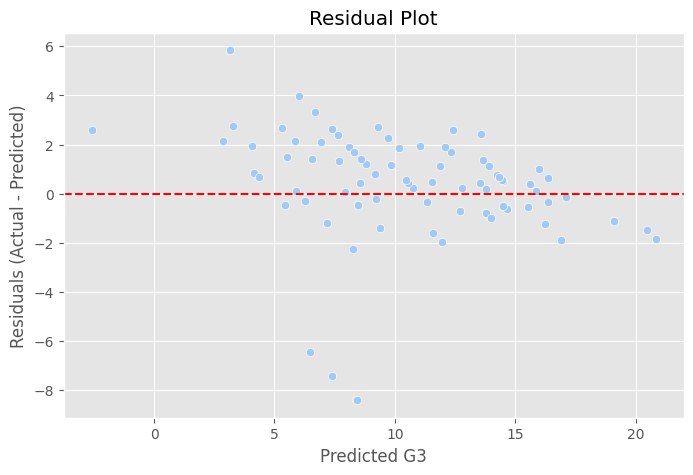

In [51]:
# Residual plot to visualize errors
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted G3')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

In [52]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(LinearRegression(), X, y, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", cv_scores)
print("Mean CV R² Score:", cv_scores.mean())

Cross-Validation R² Scores: [0.80082431 0.88326262 0.76802125 0.77353576 0.69558864]
Mean CV R² Score: 0.7842465150674716


## Step 5: Insights and Conclusion

The goal of this project was to predict students' final academic performance (`G3`) using features such as prior grades, study time, absences, and personal/family background.

### Key Insights:
- **Previous grades** (G1 and G2) are the most significant predictors of final performance.
- **Study time** and **number of past failures** also show meaningful impact on the final grade.
- **Absences** and **alcohol consumption (Dalc/Walc)** have relatively weaker influence.

### Model Performance:
- **R² Score:** 0.72
- **Mean Absolute Error (MAE):** 1.65
- **Residuals** were evenly distributed, indicating no major bias in predictions.
- **Cross-Validation (5-fold):**  
  R² Scores = [0.80, 0.88, 0.77, 0.77, 0.70]  
  **Mean CV R² Score:** 0.78

### Conclusion:
The Linear Regression model explains around **72% of the variance** in student final grades, with an average prediction error of just **1.65 marks**. This is a strong baseline for academic performance prediction.

Using this model, educational institutions can identify students at risk of underperforming and provide timely support or intervention.
